In [1]:
import numpy as np
import pandas as pd
import datetime
from datetime import timedelta
from matplotlib import dates
import matplotlib.pyplot as plt
import time

%matplotlib inline

In [2]:
def format_data(data):
    if (type(data) == str) :
        if (data == ' ') :
            return np.nan
        else :
            return np.float64(data)
    else :
        return data

In [3]:
def s_to_ns(x):
    return x/1.0e-9

In [4]:
df = pd.read_csv('./reference_waveforms/SiPM_1pe.csv')

In [5]:
df.columns

Index(['time (s)', 'IT("/IPRB0/MINUS") Ntot 7098  (A)', 'time (s).1',
       'IT("/IPRB0/MINUS") Ntot 7303  (A)'],
      dtype='object')

In [6]:
df.rename(columns={'IT("/IPRB0/MINUS") Ntot 7098  (A)' :'Ntot_7098',
                   'IT("/IPRB0/MINUS") Ntot 7303  (A)' :'Ntot_7303'
                   },
          inplace=True)

In [7]:
df.rename(columns={'time (s)'   :'time_01',
                   'time (s).1' :'time_02'
                  },
          inplace=True)

In [8]:
for x in df.columns :
     df[x]=df[x].map(format_data) 

In [9]:
df.describe()

time_01     Ntot_7098     time_02     Ntot_7303
count  596.000000  5.960000e+02  570.000000  5.700000e+02
mean     0.000004  1.327609e-06    0.000004  1.194095e-06
std      0.000004  1.946883e-06    0.000004  1.886296e-06
min      0.000000 -1.261630e-06    0.000000 -1.243155e-06
25%      0.000003  2.020290e-10    0.000003  1.278987e-10
50%      0.000003  5.825820e-08    0.000003  2.391078e-08
75%      0.000003  3.718394e-06    0.000003  2.194397e-06
max      0.000020  8.556659e-06    0.000020  8.393827e-06

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596 entries, 0 to 595
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time_01    596 non-null    float64
 1   Ntot_7098  596 non-null    float64
 2   time_02    570 non-null    float64
 3   Ntot_7303  570 non-null    float64
dtypes: float64(4)
memory usage: 18.8 KB


In [11]:
df_model01=df.copy(deep=True)
df_model02=df.copy(deep=True)

In [12]:
df_model01=df_model01[['time_01','Ntot_7098']]
df_model02=df_model02[['time_02','Ntot_7303']]

In [13]:
df_model01['time_ns_01']=df_model01['time_01'].apply(s_to_ns)
df_model02['time_ns_02']=df_model02['time_02'].apply(s_to_ns)

In [14]:
df_model01.dropna(inplace=True)
df_model02.dropna(inplace=True)

In [15]:
df_model01.drop(columns=['time_01'], inplace=True)
df_model02.drop(columns=['time_02'], inplace=True)

In [16]:
df_model01.set_index('time_ns_01',inplace=True)
df_model02.set_index('time_ns_02',inplace=True)

<Axes: xlabel='time_ns_02'>

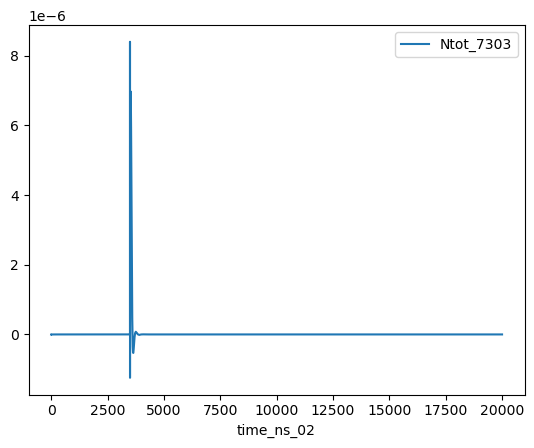

In [17]:
df_model02.plot()

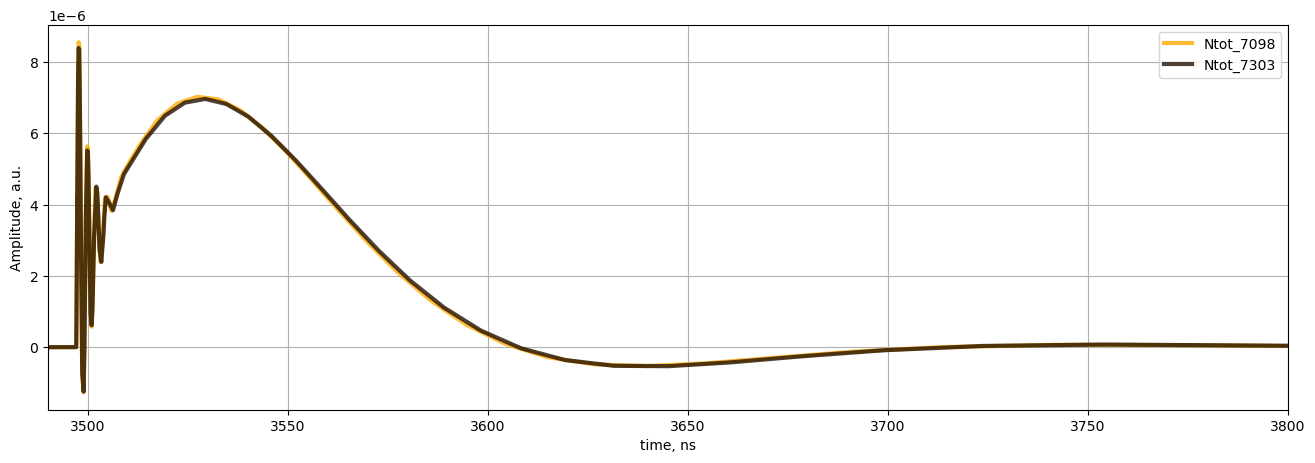

In [18]:
xlim=(3490,3800)
ax=df_model01.plot( alpha=0.8, figsize=(16,5),xlim=xlim,c='#FFAA00',linewidth=3);
df_model02.plot(ax=ax, alpha=0.8,c='#221100',linewidth=3);
ax.set(xlabel='time, ns',ylabel='Amplitude, a.u.');
ax.yaxis.grid(True)
ax.xaxis.grid(True)

In [19]:
df_ac = pd.read_csv('./reference_waveforms/ACpreamp.csv')

In [20]:
df_ac['freq (MHz)']=df_ac['freq (Hz)']/1.0e+6

In [21]:
df_ac.dropna(inplace=True)

In [22]:
df_ac.drop(columns=['freq (Hz)'],inplace=True)

In [23]:
df_ac.set_index('freq (MHz)',inplace=True)

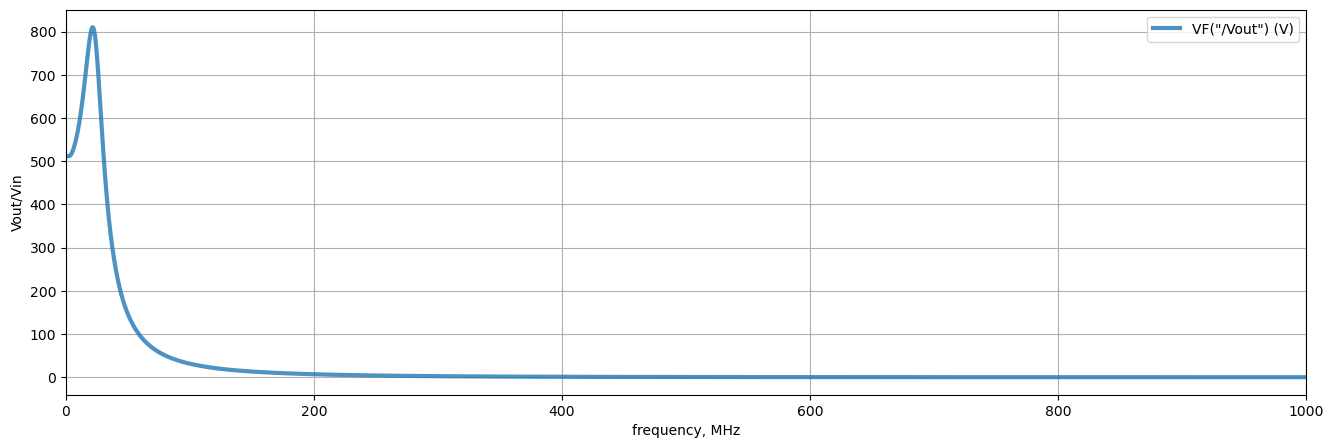

In [24]:
xlim=(0,1000)
ax=df_ac.plot( alpha=0.8, figsize=(16,5),xlim=xlim,linewidth=3);
ax.set(xlabel='frequency, MHz',ylabel='Vout/Vin');
ax.yaxis.grid(True)
ax.xaxis.grid(True)

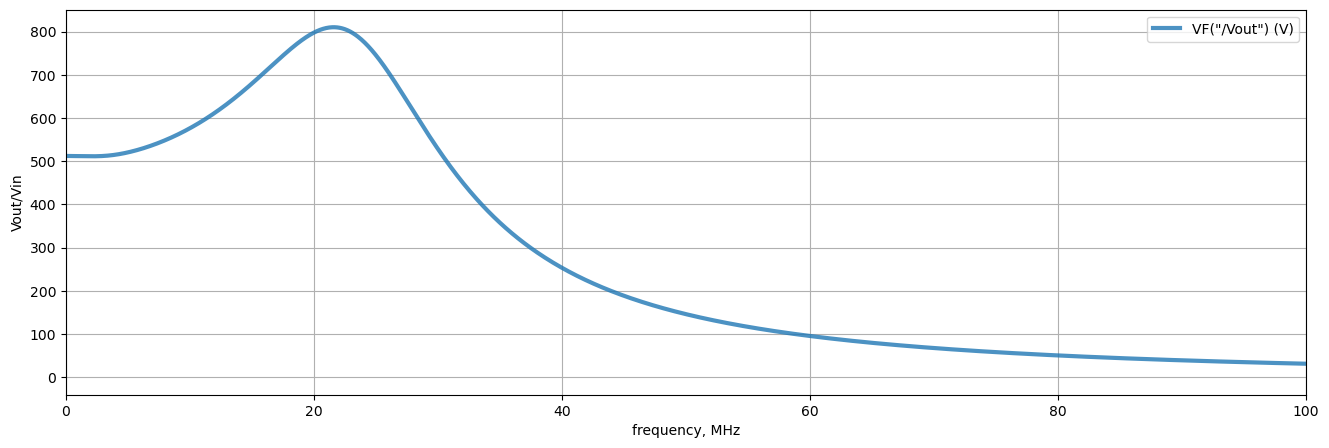

In [25]:
xlim=(0,100)
ax=df_ac.plot( alpha=0.8, figsize=(16,5),xlim=xlim,linewidth=3);
ax.set(xlabel='frequency, MHz',ylabel='Vout/Vin');
ax.yaxis.grid(True)
ax.xaxis.grid(True)

In [27]:
df_ac.to_csv('terzina_preampl_AC.csv',sep=' ',header=False)
df_model01.to_csv('FBK_MT_30um_Vov7p8_Ntot_7098.csv',sep=' ',header=False)
df_model02.to_csv('FBK_MT_30um_Vov7p8_Ntot_7303.csv',sep=' ',header=False)